In [2]:
import torch
import torchvision
import torchvision.transforms as transforms


In [3]:
#NVIDIA not really necessary; it works, buts its slower than Intel GPU:
#if torch.cuda.is_available():
#    device = torch.device("cuda")          # a CUDA device object
#    print(device)


#Common image transformations:
transform = transforms.Compose(
    #convert PIL image to tensor array:
    [transforms.ToTensor(),
    #each of the three pixel maps is centered to have mean 0.5 and std 0.5:
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

#Download CIFAR data:
#root: where data to be stored, if not exists already
#train=True: data is used for training (otherwise test set is created)
#download=True: downloads data, if not exists in root already
#transform: applies transformations to image
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

#Dataloader makes dataset an iterable object
#batch_size: how many samples per batch to load
#shuffle: have data reshuffled at every epoch
#num_workers: how many subprocesses to use for data loading (0 means data is loaded into main process)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

#Load test data set:
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


torch.Size([4, 3, 32, 32])


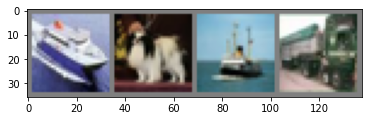

ship   dog  ship truck


In [5]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [4]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [5]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [6]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        
        #inputs.to(device)
        #labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.213
[1,  4000] loss: 1.851
[1,  6000] loss: 1.666
[1,  8000] loss: 1.567
[1, 10000] loss: 1.546
[1, 12000] loss: 1.464
[2,  2000] loss: 1.418
[2,  4000] loss: 1.356
[2,  6000] loss: 1.370
[2,  8000] loss: 1.315
[2, 10000] loss: 1.333
[2, 12000] loss: 1.301
Finished Training


In [7]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)